# This code demonstrates a Hidden markov modeling of conformational transitions betweeen markovian states

# load required packages

In [104]:
using Statistics, Plots
using Revise; using MDToolbox

In [105]:
using BSON: @load
#@load "data/t1r/t1r.bson" C T pi_i p_all indexOfCluster tau pdb psf
@load "data/t1r/t1r.bson" T pi_i p_all

In [53]:
nstate = size(T, 1)

50

# generate training data

In [55]:
state = msmgenerate(1000, T, pi_i)

1000-element Array{Int64,1}:
  2
 31
 48
 40
 21
 23
 50
 26
  2
 44
 31
 32
  9
  ⋮
 26
 44
 42
 31
 50
 37
  2
  7
 26
  7
 50
 31

# calculate emissions

In [58]:
nframe = length(state)
emission = zeros(Float64, nstate, nframe)
emission .= 0.01
for iframe = 1:nframe
    emission[state[iframe], iframe] = 1.0
end
emission .= emission ./ sum(emission, dims=1)

50×1000 Array{Float64,2}:
 0.00671141  0.00671141  0.00671141  …  0.00671141  0.00671141  0.00671141
 0.671141    0.00671141  0.00671141     0.00671141  0.00671141  0.00671141
 0.00671141  0.00671141  0.00671141     0.00671141  0.00671141  0.00671141
 0.00671141  0.00671141  0.00671141     0.00671141  0.00671141  0.00671141
 0.00671141  0.00671141  0.00671141     0.00671141  0.00671141  0.00671141
 0.00671141  0.00671141  0.00671141  …  0.00671141  0.00671141  0.00671141
 0.00671141  0.00671141  0.00671141     0.671141    0.00671141  0.00671141
 0.00671141  0.00671141  0.00671141     0.00671141  0.00671141  0.00671141
 0.00671141  0.00671141  0.00671141     0.00671141  0.00671141  0.00671141
 0.00671141  0.00671141  0.00671141     0.00671141  0.00671141  0.00671141
 0.00671141  0.00671141  0.00671141  …  0.00671141  0.00671141  0.00671141
 0.00671141  0.00671141  0.00671141     0.00671141  0.00671141  0.00671141
 0.00671141  0.00671141  0.00671141     0.00671141  0.00671141  0.00671141

In [59]:
observation = collect(1:nframe)

1000-element Array{Int64,1}:
    1
    2
    3
    4
    5
    6
    7
    8
    9
   10
   11
   12
   13
    ⋮
  989
  990
  991
  992
  993
  994
  995
  996
  997
  998
  999
 1000

# Hidden markov modeling

In [32]:
# initial transition probabilities
T0 = rand(Float64, nstate, nstate)
T0 .= T0 ./ sum(T0, dims=2)
pi_i = T0[1, :]

50-element Array{Float64,1}:
 0.03660379644749181
 0.011693958485212697
 0.023086134937501078
 0.022511380927388292
 0.005780134385693139
 0.007675700311845795
 0.0017567185850315198
 0.03621569676881288
 0.02141579809642652
 0.030794214580108715
 0.019771097491813362
 0.027215711493563857
 0.026448449699960314
 ⋮
 0.02347899053807291
 0.0196826775125554
 0.03030560852021155
 0.0351572873981991
 0.02195194619923431
 0.013674488949401317
 0.009148346488910388
 0.03611975557493067
 0.0006479999910575553
 0.008766156149279029
 0.022484795082774598
 0.01324667356332364

In [74]:
@time T1, pi_i1, emission1 = msmbaumwelch([observation], T0, pi_i, emission);

  5.094675 seconds (3.32 M allocations: 5.147 GiB, 15.47% gc time)


# visualization

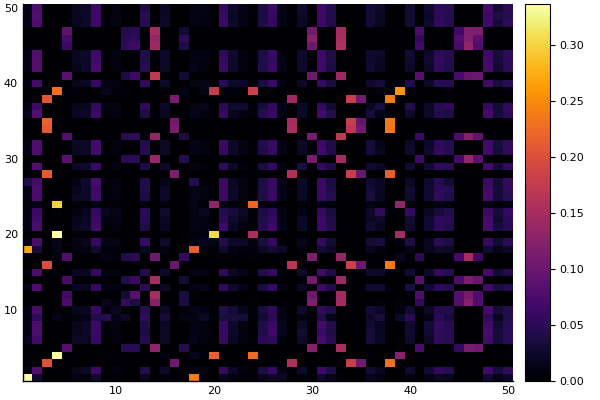

In [75]:
heatmap(T)

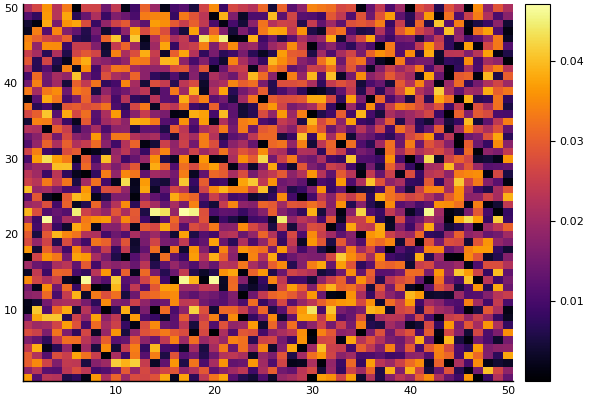

In [76]:
heatmap(T0)

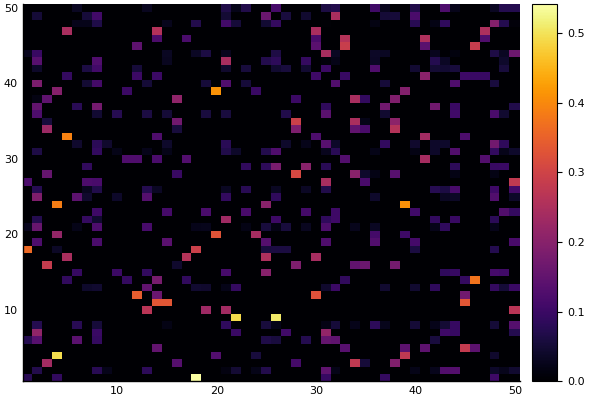

In [77]:
heatmap(T1)

# visualization 2

In [78]:
using GraphRecipes, Plots
pyplot()

Plots.PyPlotBackend()

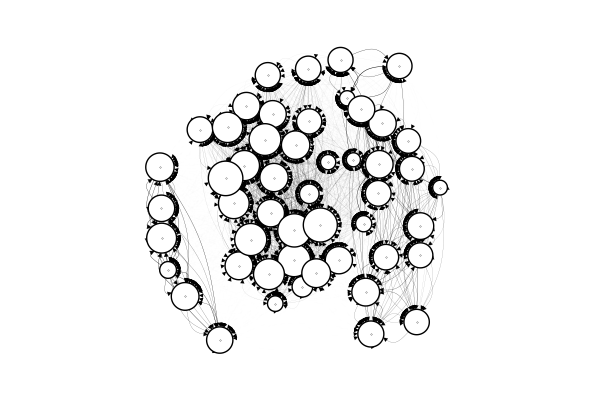

In [71]:
graphplot(T,
          markersize = 0.2,
          node_weights = pi_i,
          markercolor = :white,
          names = 1:size(T, 1),
          fontsize = 10,
          linecolor = :darkgrey,
          nodeshape = :circle,
          edgewidth = T, 
          self_edge_size = 0.0, 
          arrow = true
          )

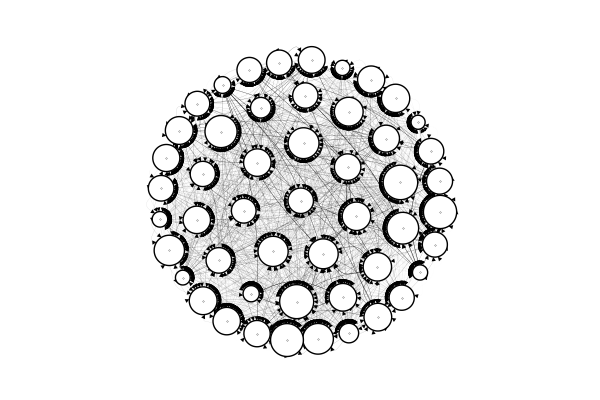

In [72]:
graphplot(T1,
          markersize = 0.2,
          node_weights = pi_i,
          markercolor = :white,
          names = 1:size(T, 1),
          fontsize = 10,
          linecolor = :darkgrey,
          nodeshape = :circle,
          edgewidth = T, 
          self_edge_size = 0.0, 
          arrow = true
          )

# Viterbi algorithm

In [102]:
@time state_estimated = msmviterbi(observation, T1, pi_i1, emission1);

  0.284579 seconds (629.63 k allocations: 33.625 MiB)


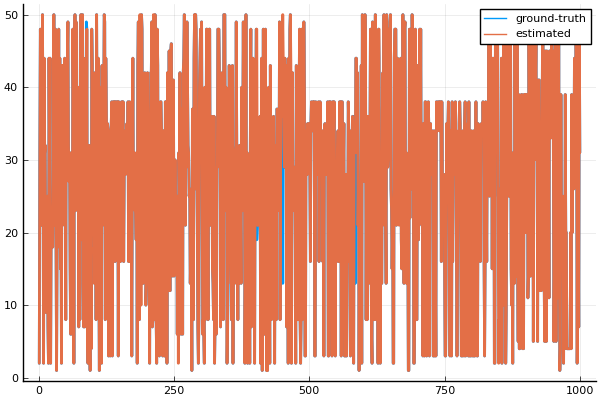

In [103]:
pyplot()
plot(state, line=(2), label="ground-truth")
plot!(state_estimated, line=(2), label="estimated", legend=:topright)